# СКиПОД визуализация результатов выполнения прогонов

## Импорт библиотек

In [ ]:
from mpl_toolkits import mplot3d
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Пример визуализации

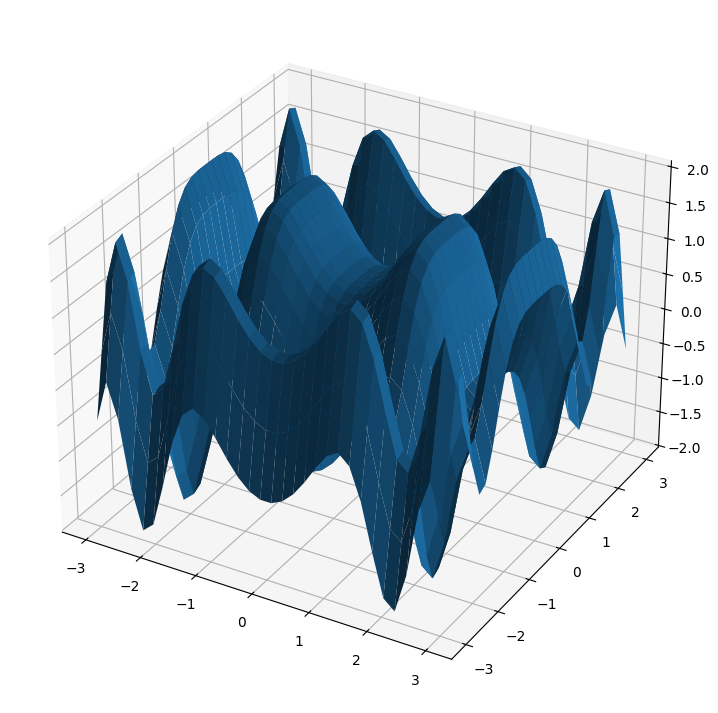

In [1]:
# Создаем данные по осям
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T  # транспонируем
z = (np.sin(x **2) + np.cos(y **2) )

# Создание рисунка
fig = plt.figure(figsize=(14, 9))
ax = plt.axes(projection='3d')

# Создание сюжета
ax.plot_surface(x, y, z)

# Показать сюжет
plt.show()

## Результаты прогона для parallel for

In [88]:
t = np.array([0.000173,  0.003117, 0.072995, 6.360267, 57.765595, 0.000167, 0.001670, 0.036864, 3.237761, 29.311453, 0.000180,
     0.001171, 0.025459, 2.143014, 20.693173, 0.000188, 0.001, 0.19741, 1.617002, 14.873810, 0.000282, 0.001294, 
     0.026422, 1.659031, 14.112389, 0.000205, 0.000789, 0.016137, 1.107664, 12.119614, 0.000195, 0.000794, 0.012346,
    1.103486, 9.167287, 0.000195, 0.000803, 0.012291, 0.848487, 9.228575, 0.000211, 0.000716, 0.013824, 0.856777, 9.110180,
    0.000272, 0.000682, 0.010609, 1.017550, 7.334358, 0.000438, 0.000704, 0.009669, 1.006881, 5.932552, 0.000640, 0.000961, 
    0.009750, 0.663500, 5.177348, 0.000978, 0.001296, 0.012496, 0.595216, 5.936165, 0.001186, 0.001360, 0.013426, 0.677454,
    4.703110, 0.001697, 0.001806, 0.024165, 0.952710, 3.336006, 0.005492, 0.001992, 0.027607, 0.460411, 3.774789, 0.009555,
    0.003376, 0.031262, 0.591688, 4.381302, 0.014271, 0.003546, 0.037491, 0.923266, 5.737227])

x = np.array([1, 2, 3, 4, 5] * 18)
y = np.repeat(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 60, 80, 100, 120, 140, 160]), 5)

In [89]:
len(t), len(x), len(y)

(90, 90, 90)

Сводная таблица по числу нитей и времени выполнения на разных датасетах

In [93]:
data = pd.DataFrame({'Датасет' : x, 'Число нитей': y, 'Время выполнения': t})

pt = data.pivot_table(values="Время выполнения", index="Число нитей", columns='Датасет')
pt.columns = ['Mini', 'Small', 'Medium', 'Large', 'ExtraLarge']
pt

,Mini,Small,Medium,Large,ExtraLarge
Число нитей,,,,,
1,0.000173,0.003117,0.072995,6.360267,57.765595
2,0.000167,0.001670,0.036864,3.237761,29.311453
3,0.000180,0.001171,0.025459,2.143014,20.693173
4,0.000188,0.001000,0.197410,1.617002,14.873810
5,0.000282,0.001294,0.026422,1.659031,14.112389
6,0.000205,0.000789,0.016137,1.107664,12.119614
7,0.000195,0.000794,0.012346,1.103486,9.167287
8,0.000195,0.000803,0.012291,0.848487,9.228575
9,0.000211,0.000716,0.013824,0.856777,9.110180


### График

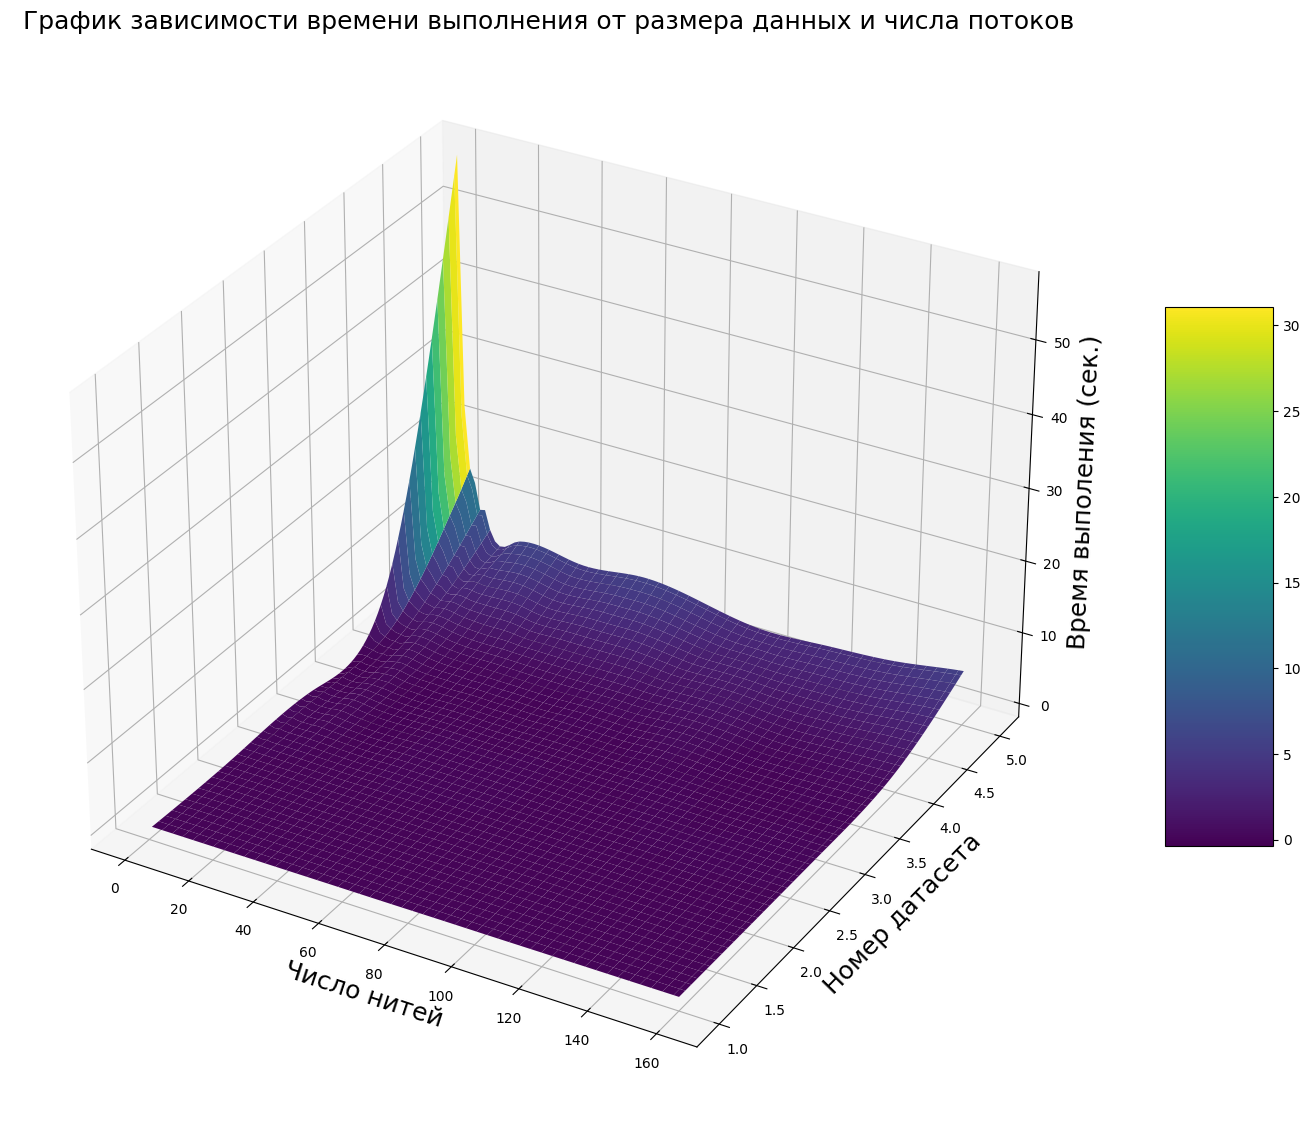

In [94]:

# Время для каждого прогона в соответствии с таблицей
z = np.array([0.000173,  0.003117, 0.072995, 6.360267, 57.765595,
              0.000167, 0.001670, 0.036864, 3.237761, 29.311453,
              0.000180, 0.001171, 0.025459, 2.143014, 20.693173,
              0.000188, 0.001, 0.19741, 1.617002, 14.873810,
              0.000282, 0.001294, 0.026422, 1.659031, 14.112389,
              0.000205, 0.000789, 0.016137, 1.107664, 12.119614,
              0.000195, 0.000794, 0.012346, 1.103486, 9.167287,
              0.000195, 0.000803, 0.012291, 0.848487, 9.228575,
              0.000211, 0.000716, 0.013824, 0.856777, 9.110180,
              0.000272, 0.000682, 0.010609, 1.017550, 7.334358,
              0.000438, 0.000704, 0.009669, 1.006881, 5.932552,
              0.000640, 0.000961, 0.009750, 0.663500, 5.177348,
              0.000978, 0.001296, 0.012496, 0.595216, 5.936165,
              0.001186, 0.001360, 0.013426, 0.677454, 4.703110,
              0.001697, 0.001806, 0.024165, 0.952710, 3.336006,
              0.005492, 0.001992, 0.027607, 0.460411, 3.774789,
              0.009555, 0.003376, 0.031262, 0.591688, 4.381302,
              0.014271, 0.003546, 0.037491, 0.923266, 5.737227])
# разметка под датасеты
y = np.array([1, 2, 3, 4, 5] * 18)
# число нитей
x = np.repeat(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 60, 80, 100, 120, 140, 160]), 5)

# Создание регулярной сетки
xi = np.linspace(x.min(), x.max(), 100)  # 100 точек вдоль оси x
yi = np.linspace(y.min(), y.max(), 100)  # 100 точек вдоль оси y
xi, yi = np.meshgrid(xi, yi)

# Интерполяция данных на регулярную сетку
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Построение 3D-графика
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi, yi, zi, cmap='viridis')

# Добавление цветовой шкалы
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Подписи осей
ax.set_xlabel('Число нитей', fontsize=18)
ax.set_ylabel('Номер датасета', fontsize=18)
ax.set_zlabel('Время выполения (сек.)', fontsize=18)
# ax.set_yticks(np.arange(1, 6), ['Mini', 'Small', 'Medium', 'Large', 'ExtraLarge'])
plt.title('График зависимости времени выполнения от размера данных и числа потоков', fontsize=18)

plt.show()

## Результаты прогона для директвы task

In [3]:
z = np.array([0.000149, 0.002904, 0.070436, 8.038869, 61.422909, 
 0.000262, 0.002011, 0.029170, 3.138006, 27.870125, 
 0.000250, 0.002057, 0.021344, 3.120079, 26.229170, 
 0.000463, 0.002346, 0.029545, 4.717738, 46.752775, 
 0.000238, 0.001925, 0.028801, 4.137136, 38.897969, 
 0.000408, 0.001958, 0.020458, 2.591000, 24.530065, 
 0.000425, 0.001938, 0.020607, 2.805597, 39.332868, 
 0.000744, 0.004089, 0.047585, 9.337623, 139.013408, 
 0.000512, 0.002122, 0.035006, 5.612301, 54.12302, 
 0.000555, 0.002860, 0.041952, 6.578411, 74.320142, 
 0.000604, 0.002766, 0.026081, 4.441720, 69.831966, 
 0.000849, 0.002949, 0.030216, 4.220109, 52.104172, 
 0.001394, 0.003824, 0.036329, 7.794712, 56.611791, 
 0.001927, 0.004211, 0.079822, 4.912104, 62.78214, 
 0.002692, 0.005869, 0.136750, 0.985115, 72.632057, 
 0.020284, 0.016106, 0.063368, 7.860014, 173.136570, 
 0.030506, 0.015082, 0.052952, 4.598796, 7.890473, 
 0.026584, 0.005726, 0.040315, 2.195765, 69.775297])

y = np.array([1, 2, 3, 4, 5] * 18)
x = np.repeat(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 60, 80, 100, 120, 140, 160]), 5)

In [5]:
data = pd.DataFrame({'Число нитей' : x, 'Датасет': y, 'Время выполнения': z})

pt = data.pivot_table(values="Время выполнения", index="Число нитей", columns='Датасет')
pt.columns = ['Mini', 'Small', 'Medium', 'Large', 'ExtraLarge']
pt

,Mini,Small,Medium,Large,ExtraLarge
Число нитей,,,,,
1,0.000149,0.002904,0.070436,8.038869,61.422909
2,0.000262,0.002011,0.029170,3.138006,27.870125
3,0.000250,0.002057,0.021344,3.120079,26.229170
4,0.000463,0.002346,0.029545,4.717738,46.752775
5,0.000238,0.001925,0.028801,4.137136,38.897969
6,0.000408,0.001958,0.020458,2.591000,24.530065
7,0.000425,0.001938,0.020607,2.805597,39.332868
8,0.000744,0.004089,0.047585,9.337623,139.013408
9,0.000512,0.002122,0.035006,5.612301,54.123020


### График

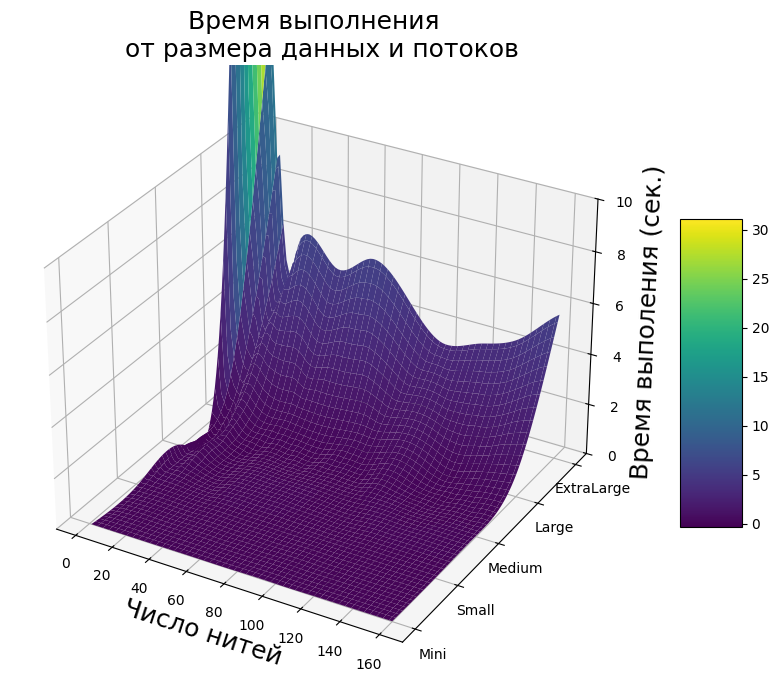

In [95]:
# Построение 3D-графика
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi, yi, zi, cmap='viridis')

# Добавление цветовой шкалы
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Подписи осей
ax.set_xlabel('Число нитей', fontsize=18)
# ax.set_ylabel('Номер датасета', fontsize=18)
ax.set_zlabel('Время выполения (сек.)', fontsize=18)
ax.set_zlim(0, 10)
ax.set_yticks(np.arange(1, 6), ['Mini', 'Small', 'Medium', 'Large', 'ExtraLarge'])
plt.title('Время выполнения \n от размера данных и потоков', fontsize=18)

plt.show()

## Результаты прогона для mpi

In [6]:
z = [0.203366, 28.097266, 263.352222,
     0.129331, 15.292906, 138.061106,
     0.103017, 11.143740, 97.632123, 
     0.079740, 8.739041, 75.274362,
     0.082819, 7.703834, 64.623795,
     0.075843, 6.795627, 56.815157,
     0.073294, 6.355657, 51.464350,
     0.076511, 5.792682, 46.392596,
     0.065882, 4.933087, 42.601655,
     0.060450, 4.525320, 39.172380,
     0.078074, 4.657109, 38.139866,
     0.100999, 5.017628, 39.578404, # 40
    ]
     # 4.351240, 36.425080,
     # 3.621490, 30.538230,
     # 3.017330, 25.426450,
     # 2.592440, 21.832600, # 120
     # 2.271660, 19.072830,
     # 2.015520, 16.946440 

y = np.array([3, 4, 5] * 12)
x = np.repeat(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40]), 3)

In [11]:
data = pd.DataFrame({'Число процессов' : x, 'Датасет': y, 'Время выполнения': z})

pt = data.pivot_table(values="Время выполнения", index="Число процессов", columns='Датасет')
pt.columns = ['Medium', 'Large', 'ExtraLarge']
pt

,Medium,Large,ExtraLarge
Число процессов,,,
1,0.203366,28.097266,263.352222
2,0.129331,15.292906,138.061106
3,0.103017,11.143740,97.632123
4,0.079740,8.739041,75.274362
5,0.082819,7.703834,64.623795
6,0.075843,6.795627,56.815157
7,0.073294,6.355657,51.464350
8,0.076511,5.792682,46.392596
9,0.065882,4.933087,42.601655


### График 1

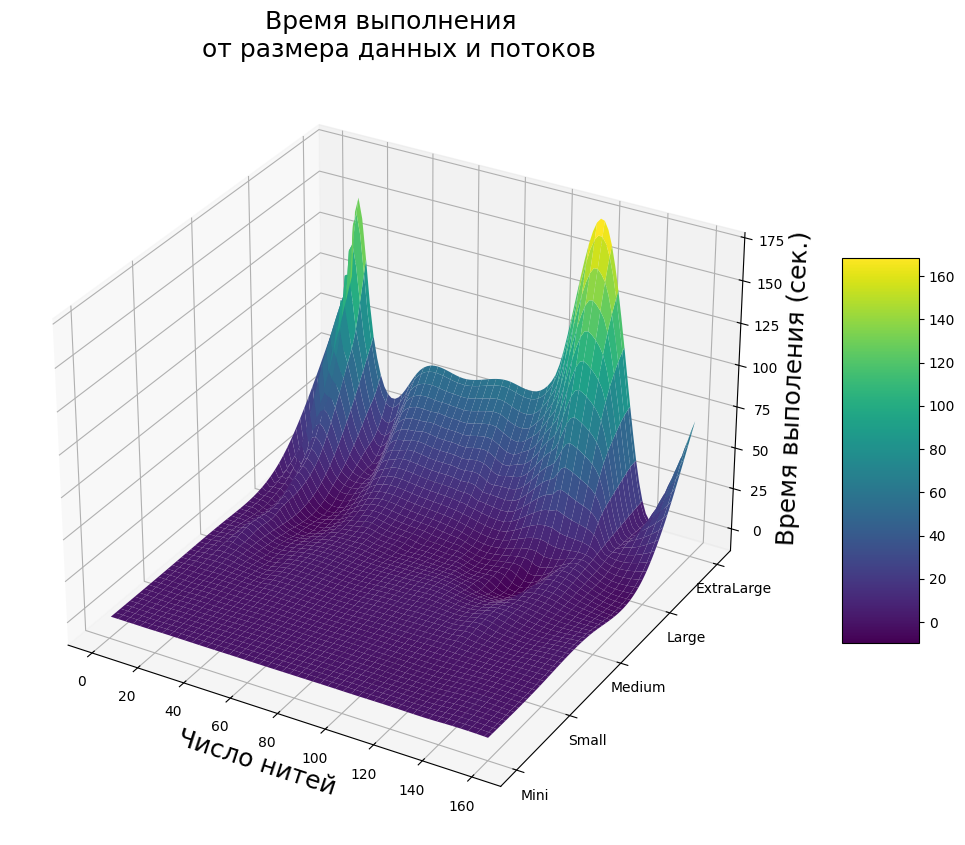

In [82]:
# Создание регулярной сетки
xi = np.linspace(x.min(), x.max(), 100)  # 100 точек вдоль оси x
yi = np.linspace(y.min(), y.max(), 100)  # 100 точек вдоль оси y
xi, yi = np.meshgrid(xi, yi)

# Интерполяция данных на регулярную сетку
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Построение 3D-графика
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi, yi, zi, cmap='viridis')

# Добавление цветовой шкалы
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Подписи осей
ax.set_xlabel('Число нитей', fontsize=18)
# ax.set_ylabel('Номер датасета', fontsize=18)
ax.set_zlabel('Время выполения (сек.)', fontsize=18)
# ax.set_zlim(0, 10)
ax.set_yticks(np.arange(1, 6), ['Mini', 'Small', 'Medium', 'Large', 'ExtraLarge'])
plt.title('Время выполнения \n от размера данных и потоков', fontsize=18)

plt.show()

### График 2

In [29]:
z = [28.097266, 263.352222,
     15.292906, 138.061106,
     11.143740, 97.632123, 
     8.739041, 75.274362,
     7.703834, 64.623795,
     6.795627, 56.815157,
     6.355657, 51.464350,
     5.792682, 46.392596,
     4.933087, 42.601655,
     4.525320, 39.172380,
     4.657109, 38.139866,
     5.017628, 39.578404, # 40
     4.351240, 36.425080,
     3.621490, 30.538230,
     3.017330, 25.426450,
     2.592440, 21.832600, # 120
    ]

y = np.array([4, 5] * 16)
x = np.repeat(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 60, 80, 100, 120]), 2)

In [30]:
len(z)

32

In [31]:
data = pd.DataFrame({'Число процессов' : x, 'Датасет': y, 'Время выполнения': z})

pt = data.pivot_table(values="Время выполнения", index="Число процессов", columns='Датасет')
pt.columns = ['Large', 'ExtraLarge']
pt

,Large,ExtraLarge
Число процессов,,
1,28.097266,263.352222
2,15.292906,138.061106
3,11.143740,97.632123
4,8.739041,75.274362
5,7.703834,64.623795
6,6.795627,56.815157
7,6.355657,51.464350
8,5.792682,46.392596
9,4.933087,42.601655


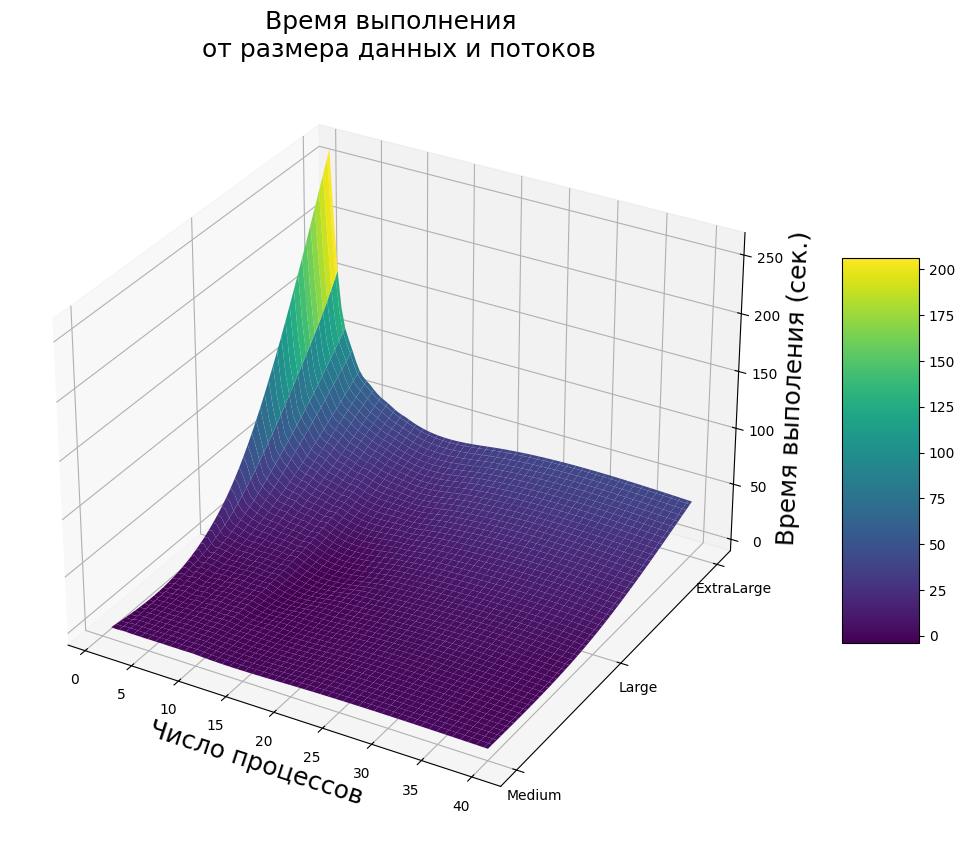

In [16]:
# Создание регулярной сетки
xi = np.linspace(x.min(), x.max(), 100)  # 100 точек вдоль оси x
yi = np.linspace(y.min(), y.max(), 100)  # 100 точек вдоль оси y
xi, yi = np.meshgrid(xi, yi)

# Интерполяция данных на регулярную сетку
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Построение 3D-графика
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi, yi, zi, cmap='viridis')

# Добавление цветовой шкалы
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Подписи осей
ax.set_xlabel('Число процессов', fontsize=18)
# ax.set_ylabel('Номер датасета', fontsize=18)
ax.set_zlabel('Время выполения (сек.)', fontsize=18)
# ax.set_zlim(0, 10)
ax.set_yticks(np.arange(3, 6), ['Medium', 'Large', 'ExtraLarge'])
plt.title('Время выполнения \n от размера данных и потоков', fontsize=18)

plt.show()

### График 3

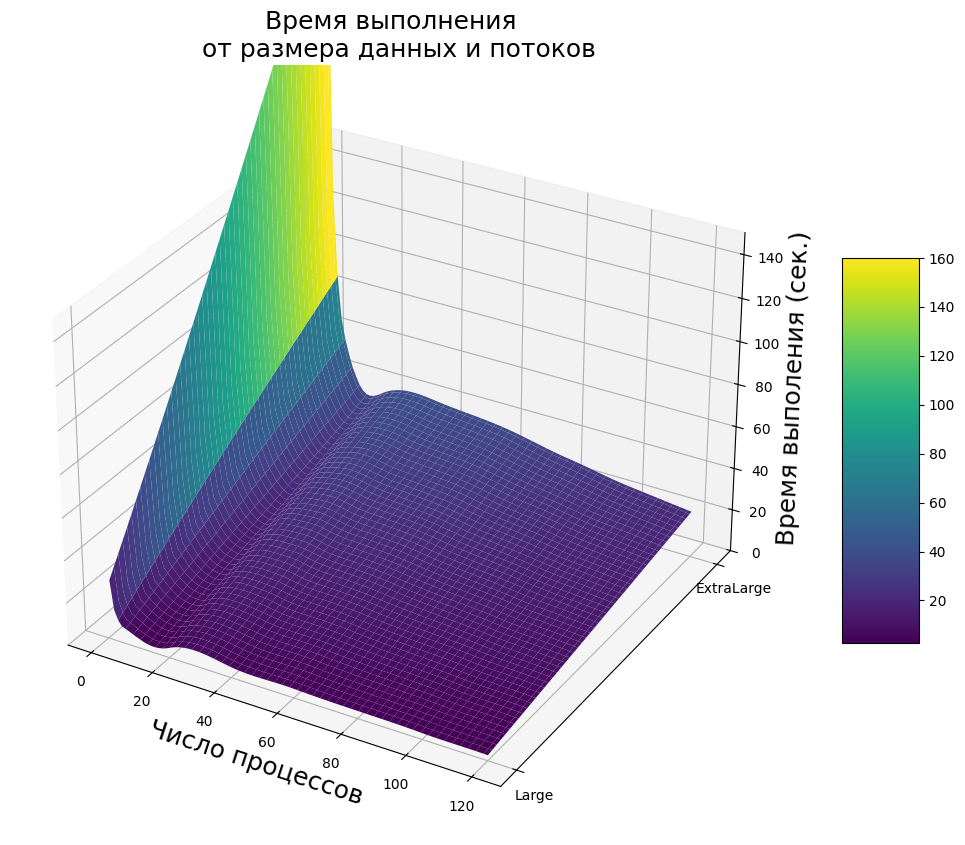

In [33]:
# Создание регулярной сетки
xi = np.linspace(x.min(), x.max(), 100)  # 100 точек вдоль оси x
yi = np.linspace(y.min(), y.max(), 100)  # 100 точек вдоль оси y
xi, yi = np.meshgrid(xi, yi)

# Интерполяция данных на регулярную сетку
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Построение 3D-графика
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi, yi, zi, cmap='viridis')

# Добавление цветовой шкалы
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Подписи осей
ax.set_xlabel('Число процессов', fontsize=18)
# ax.set_ylabel('Номер датасета', fontsize=18)
ax.set_zlabel('Время выполения (сек.)', fontsize=18)
ax.set_zlim(0, 150)
ax.set_yticks(np.arange(4, 6), ['Large', 'ExtraLarge'])
plt.title('Время выполнения \n от размера данных и потоков', fontsize=18)

plt.show()

### Сравнение всех методов на самом большом датасете

In [34]:
z = [263.352222, 138.061106, 97.632123, 75.274362, 64.623795, 56.815157,
     51.464350, 46.392596, 42.601655, 39.172380, 38.139866, 39.578404, # 40
     36.425080, 30.538230, 25.426450, 21.832600, 19.072830, 16.946440]

In [35]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 60, 80, 100, 120, 140, 160]

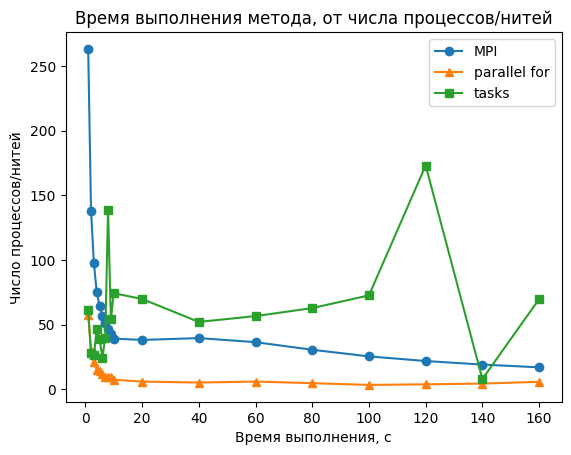

In [41]:
z2 = np.array([57.765595, 29.311453, 20.693173, 14.873810, 14.112389, 12.119614, 9.167287, 9.228575, 9.110180,
              7.334358, 5.932552, 5.177348, 5.936165, 4.703110, 3.336006, 3.774789, 4.381302, 5.737227])
z3 = np.array([61.422909, 27.870125, 26.229170, 46.752775, 38.897969, 24.530065, 
 39.332868, 139.013408, 54.12302, 74.320142, 69.831966, 52.104172, 56.611791, 62.78214, 72.632057, 173.136570, 7.890473, 69.775297])

plt.plot(x, z, marker='o', label='MPI')
plt.plot(x, z2, marker='^', label='parallel for')
plt.plot(x, z3, marker='s', label='tasks')
plt.title('Время выполнения метода, от числа процессов/нитей')
plt.xlabel('Время выполнения, с')
plt.ylabel('Число процессов/нитей')
plt.legend()